Logistic Regression: HR Dataset

This is the dataset of a large company, which has around 4000 employees. Every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. This level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:
* the former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
* a sizeable department has to be maintained, for the purposes of recruiting new talent
* more often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, it is important to understand what factors cause attrition. In other words, it is important to undersand what needs to be changed in order to get most of the employees to stay. Therefore, the goal of the study is to model the probability of attrition based on certain features.

In [3]:
# Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd  
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv("dataset.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Data Preprocessing

In [9]:
# Null elements
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [11]:
df.shape

(4410, 24)

In [12]:
# We can either fill the nulls with 0 or delete the rows. 
# In this case we can try to delete the rows with missing 
# elements since we have quite a lot of data.

# Fill
# data.fillna(0, inplace =True)

# Drop
data = df.dropna(how='any', axis=0)
data.shape

(4382, 24)

In [13]:
# We remove unnecessary information
data.drop(['EmployeeCount','EmployeeID','StandardHours', 'Over18'], axis=1, inplace=True)

#   * 'EmployeeCount' is always equal to 1 (as employees are interviewed one at a time)
#   * 'EmployeeID' are unique values 
#   * 'StandardHours' is (basically) always 8
#   * 'Over18' because all the employees are >18

data.shape

(4382, 20)

Exploratory Data Analysis (EDA)

705
3677
The percentage of employee that left in the previous year is:  16.08854404381561 %
The percentage of employee that did not leave in the previous year is:  83.91145595618438 %


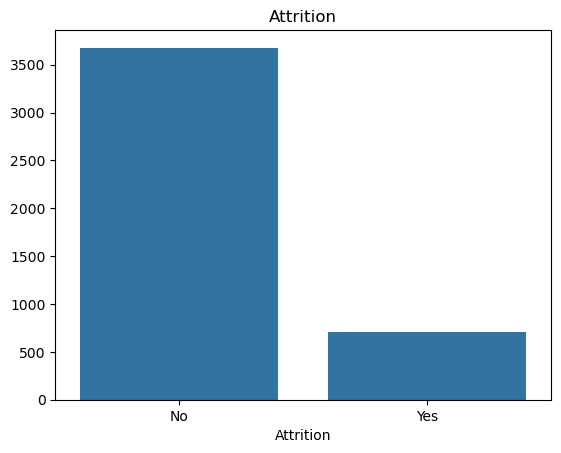

In [25]:
# How many employee left in the previous year?
print(len(data[data['Attrition']=='Yes']))
print(len(data[data['Attrition']=='No']))

print('The percentage of employee that left in the previous year is: ',
      (len(data[data['Attrition']=='Yes'])/len(data))*100, '%')
print('The percentage of employee that did not leave in the previous year is: ',
      (len(data[data['Attrition']=='No'])/len(data))*100, '%')

sns.countplot(x = "Attrition", data=data)
plt.title('Attrition')
plt.ylabel(None)
plt.show()

In [27]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
len(data.columns)

20

In [31]:
## For visualization purposes, let's define a function 
## to plot categorical variables based on a particular
## hue and to print the percentage.

def countplot_with_perc(x, data, hue):
    
    # Define the plot
    ax         = sns.countplot(x=x, data=data, hue=hue);
    bars       = ax.patches
    half       = int(len(bars)/2)
    left_bars  = bars[:half]
    right_bars = bars[half:]

    # Add the percentage
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total    = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2.,
            height_l + 40, '{0:.0%}'.format(height_l/total), ha='center');
        ax.text(right.get_x() + right.get_width()/2.,
            height_r + 40, '{0:.0%}'.format(height_r/total), ha='center');


## Define a customized histplot for continuous variables.

def histplot_continuous(x, data, hue):
    sns.histplot(data=data, x=x, hue=hue,
        kde=True, bins=15, palette='tab10', multiple='stack', line_kws={'lw': 5});


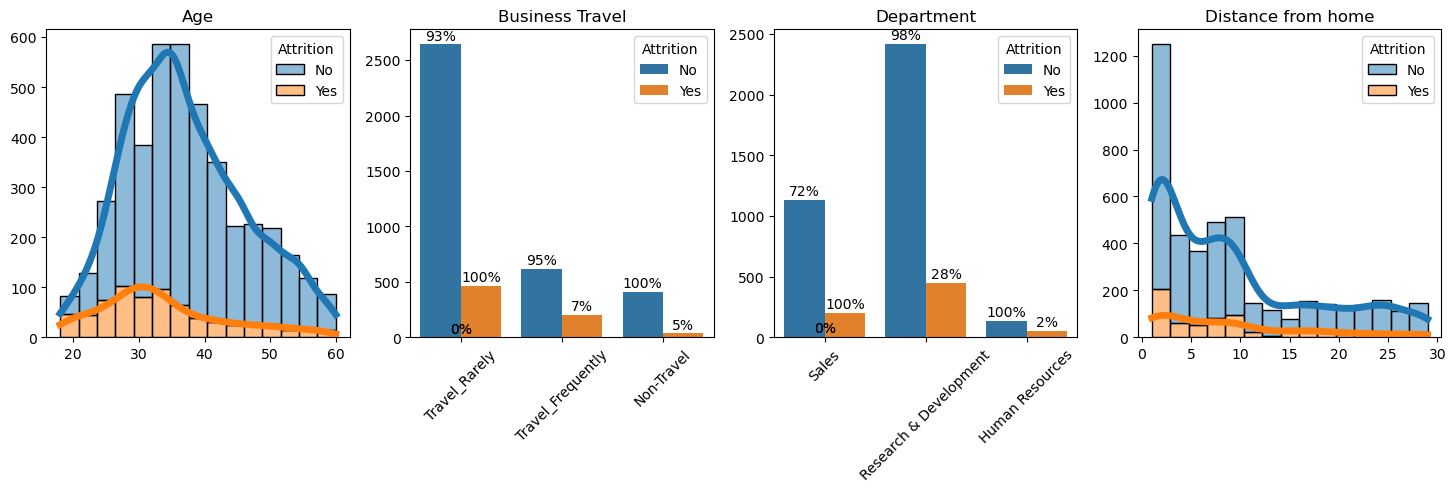

In [33]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
histplot_continuous(x='Age', data=data, hue=hue);
plt.title('Age')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='BusinessTravel', data=data, hue=hue);
plt.title('Business Travel')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
countplot_with_perc(x='Department', data=data, hue=hue);
plt.title('Department')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)
histplot_continuous(x='DistanceFromHome', data=data, hue=hue);
plt.title('Distance from home')
plt.ylabel(None);
plt.xlabel(None);

Insights

* 'Business Travel' seems to have an influence on the attrition: the percentage of employees who left increases when the frequency with which they traveled 
* Also 'Department' could have an influence: the highest percentage of people who have left the company is in 'Human Resources'
* Instead, 'Distance from home' and 'Age' do not have particularly different trends for the two categories of people, so they do not seem to be very relevant features

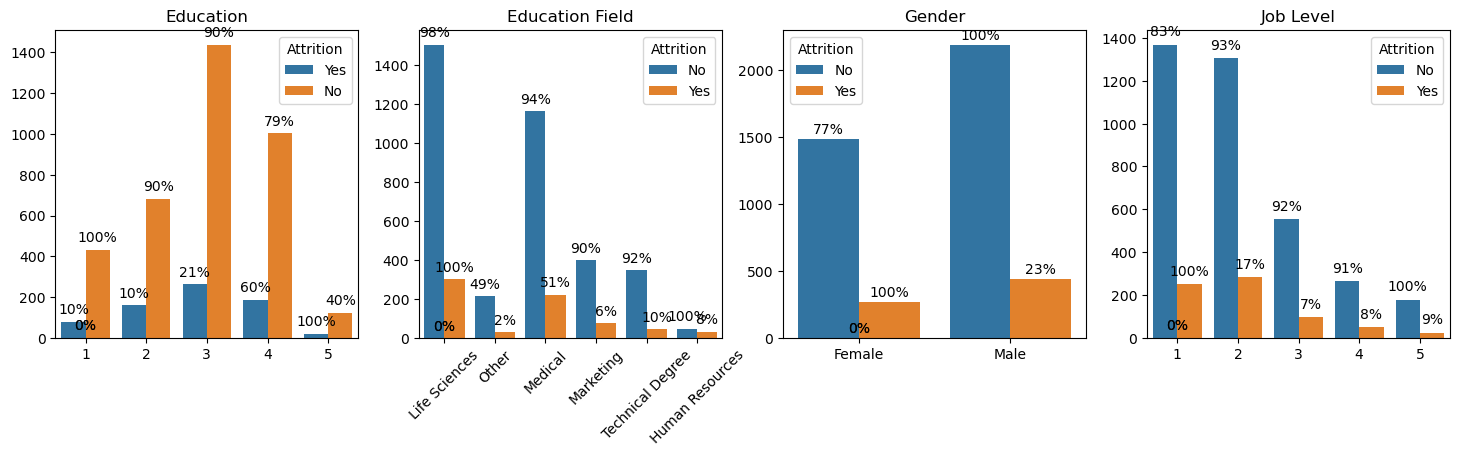

In [35]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='Education', data=data, hue=hue);
plt.title('Education')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='EducationField', data=data, hue=hue);
plt.title('Education Field')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
countplot_with_perc(x='Gender', data=data, hue=hue);
plt.title('Gender')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)       
countplot_with_perc(x='JobLevel', data=data, hue=hue);            
plt.title('Job Level')
plt.ylabel(None);
plt.xlabel(None);

Insights

* The education level, as well as the gender and the job level, does not seem to be particularly relevant, the percentages are fairly homogeneous
* Instead, the education field could have an impact (this could be related to the 'Department')

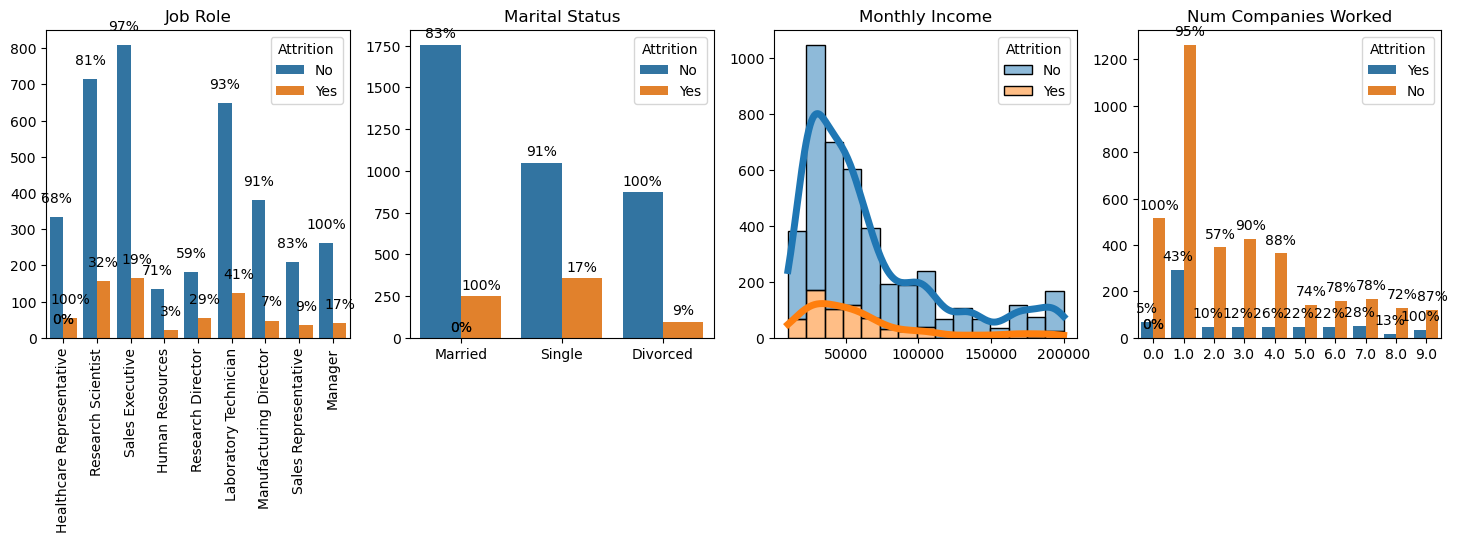

In [37]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='JobRole', data=data, hue=hue);            
plt.title('Job Role')
plt.xticks(rotation=90);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='MaritalStatus', data=data, hue=hue);
plt.title('Marital Status')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
histplot_continuous(x='MonthlyIncome', data=data, hue=hue);
plt.title('Monthly Income')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)
countplot_with_perc(x='NumCompaniesWorked', data=data, hue=hue);            
plt.title('Num Companies Worked')
plt.ylabel(None);
plt.xlabel(None);


Insights

* The job role and the number of companies the employeed worked for do not seem to have a strong impact on the attrition 
* The marital status, instead, is quite relevant: the highest percentage of employees who left (among the three groups) were single
* Also the income does not seem to be of particular relevance: obviously as salary increases the number of people leaving the company decreases, but in general also the number of employees

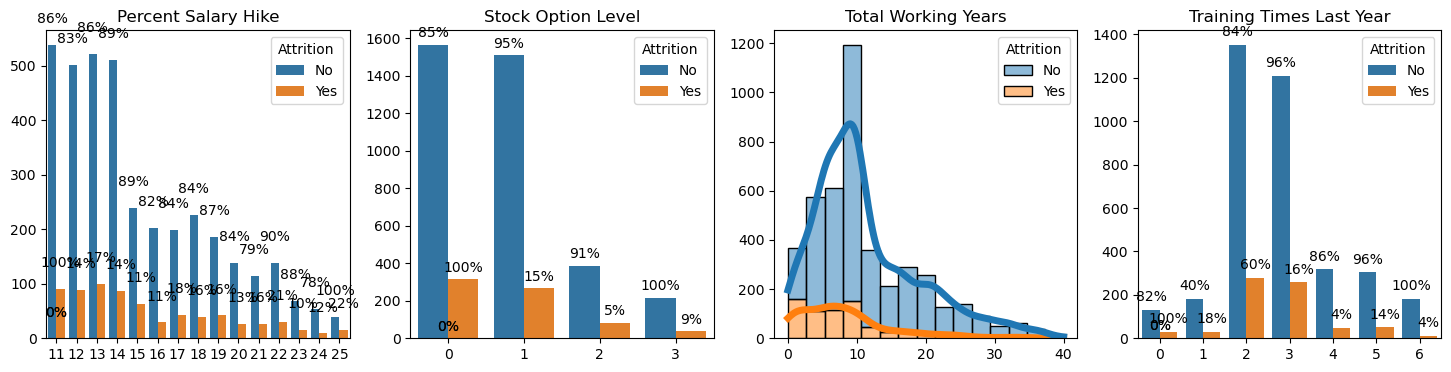

In [39]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='PercentSalaryHike', data=data, hue=hue);
plt.title('Percent Salary Hike')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='StockOptionLevel', data=data, hue=hue);            
plt.title('Stock Option Level')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
histplot_continuous(x='TotalWorkingYears', data=data, hue=hue);
plt.title('Total Working Years')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)
countplot_with_perc(x='TrainingTimesLastYear', data=data, hue=hue);
plt.title('Training Times Last Year')
plt.ylabel(None);
plt.xlabel(None);

Insights

* Of all the variables, none in particular is shown to be relevant (perhaps, slightly, 'Training Times Last Year')

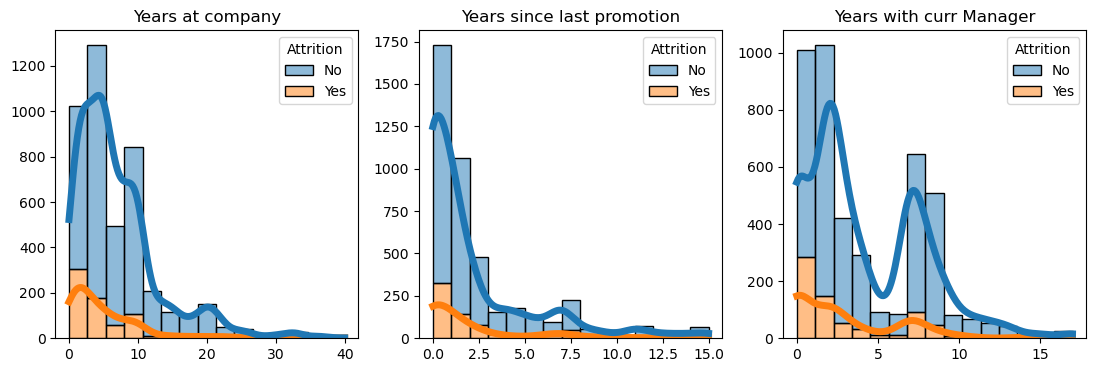

In [41]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
histplot_continuous(x='YearsAtCompany', data=data, hue=hue);
plt.title('Years at company')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
histplot_continuous(x='YearsSinceLastPromotion', data=data, hue=hue);
plt.title('Years since last promotion')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
histplot_continuous(x='YearsWithCurrManager', data=data, hue=hue);
plt.title('Years with curr Manager')
plt.ylabel(None);
plt.xlabel(None);

In [ ]:
Insights

* Also in this case, of all the variables, none in particular is shown to be relevant

Feature Selection

From previous analyses (EDA) we certainly want to take into account (since they were visually influential):

* Business Travel
* Department
* Education Field
* Marital Status

In [43]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [45]:
data.iloc[0]

Age                                               51
Attrition                                         No
BusinessTravel                         Travel_Rarely
Department                                     Sales
DistanceFromHome                                   6
Education                                          2
EducationField                         Life Sciences
Gender                                        Female
JobLevel                                           1
JobRole                    Healthcare Representative
MaritalStatus                                Married
MonthlyIncome                                 131160
NumCompaniesWorked                               1.0
PercentSalaryHike                                 11
StockOptionLevel                                   0
TotalWorkingYears                                1.0
TrainingTimesLastYear                              6
YearsAtCompany                                     1
YearsSinceLastPromotion                       

Encoding

In [47]:
# Convert all the Categorical data into numerical data
print(data['BusinessTravel'].unique())
print(data['Department'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']


In [49]:
from sklearn.preprocessing import LabelEncoder

In [51]:
# Encode categorical features
labelEncoder_X = LabelEncoder()

data['BusinessTravel'] = labelEncoder_X.fit_transform(data['BusinessTravel'])
data['Department']     = labelEncoder_X.fit_transform(data['Department'])
data['EducationField'] = labelEncoder_X.fit_transform(data['EducationField'])
data['Gender']         = labelEncoder_X.fit_transform(data['Gender'])
data['JobRole']        = labelEncoder_X.fit_transform(data['JobRole'])
data['MaritalStatus']  = labelEncoder_X.fit_transform(data['MaritalStatus'])

# Encode label
label_encoder_y = LabelEncoder()

data['Attrition'] = label_encoder_y.fit_transform(data['Attrition'])


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4382 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   int64  
 2   BusinessTravel           4382 non-null   int64  
 3   Department               4382 non-null   int64  
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   int64  
 7   Gender                   4382 non-null   int64  
 8   JobLevel                 4382 non-null   int64  
 9   JobRole                  4382 non-null   int64  
 10  MaritalStatus            4382 non-null   int64  
 11  MonthlyIncome            4382 non-null   int64  
 12  NumCompaniesWorked       4382 non-null   float64
 13  PercentSalaryHike        4382 non-null   int64  
 14  StockOptionLevel         4382

In [55]:
data.head().T

,0,1,2,3,4
Age,51.0,31.0,32.0,38.0,32.0
Attrition,0.0,1.0,0.0,0.0,0.0
BusinessTravel,2.0,1.0,1.0,0.0,2.0
Department,2.0,1.0,1.0,1.0,1.0
DistanceFromHome,6.0,10.0,17.0,2.0,10.0
Education,2.0,1.0,4.0,5.0,1.0
EducationField,1.0,1.0,4.0,1.0,3.0
Gender,0.0,0.0,1.0,1.0,1.0
JobLevel,1.0,1.0,4.0,3.0,1.0
JobRole,0.0,6.0,7.0,1.0,7.0


Correlation Matrix

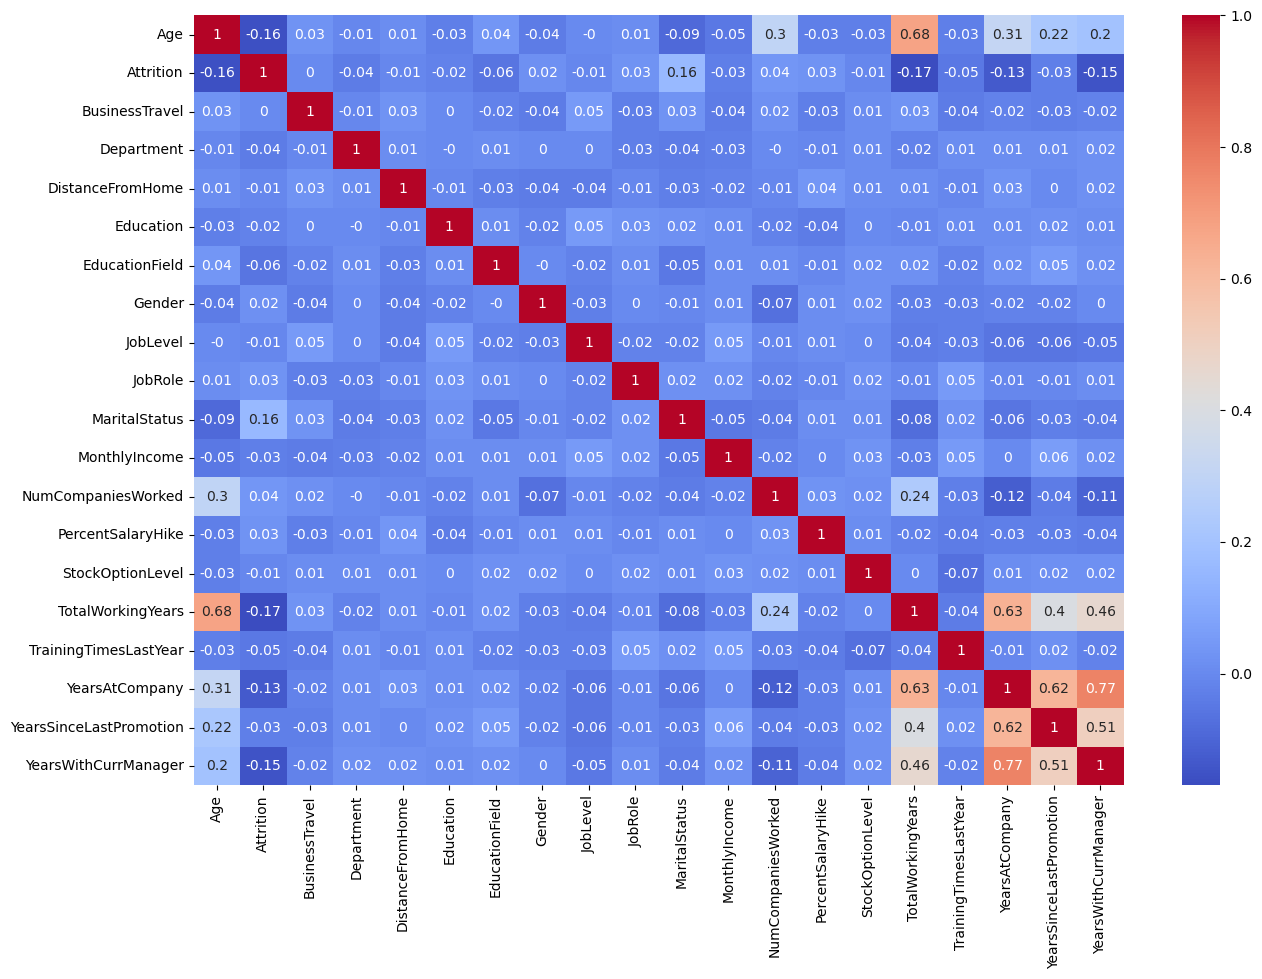

In [57]:
# Correlation matrix
correlation_matrix = data.corr().round(2)

plt.figure(figsize=(15,10));
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm');

The correlation coefficient ranges from -1 to 1:
* if the value is close to 1 there is a strong positive correlation between the two variables
* if the value is close to -1, the variables have a strong negative correlation

To fit a linear regression model, we select those features which have a **high correlation** with our target variable.<br>
An important point in selecting features for a linear regression model is to **check for multi-co-linearity**.<br> 

By looking at the correlation matrix, in concordance with what was seen in the EDA, it is hard to see a strong correlation between the independent variables and the dependent variable. In addition, there are a couple of variables that would be worth keeping an eye on (those that are highly correlated with each other).

Logistic Regression with Scikit-Learn

In [59]:
!pip install scikit-plot

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


FULL-set of features

In [63]:
X = data.drop('Attrition', axis=1)
Y = data['Attrition']

# Train and validation split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3505, 19)
(877, 19)
(3505,)
(877,)


Reduced-set of features

In [65]:
X2 = data[['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']]

# Train and validation split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3505, 19)
(877, 19)
(3505,)
(877,)


In [67]:
# Normalization of the features
Scaler_X = StandardScaler()
X_train  = Scaler_X.fit_transform(X_train)
X_test   = Scaler_X.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make the prediction on the test
Y_pred = model.predict(X_test)

# Print accuracy and confusion matrix
print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Accuracy on the test set: 0.86
Confusion matrix:
 [[742   5]
 [121   9]]


In [73]:
# Classification report
print(classification_report(Y_test, Y_pred));

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       747
           1       0.64      0.07      0.12       130

    accuracy                           0.86       877
   macro avg       0.75      0.53      0.52       877
weighted avg       0.83      0.86      0.80       877



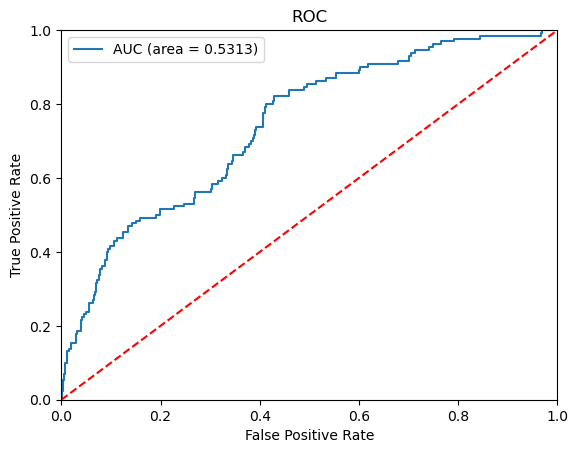

In [75]:
# Area Under Curve (AUC)
model_roc_auc = roc_auc_score(Y_test, model.predict(X_test))

# Plot
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.0]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend();

In [77]:
## Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model.coef_[0])):
    coefficients[X.columns[i]] = model.coef_[0][i]

# Add the intercept
coefficients['Intercept'] = model.intercept_[0]
coefficients

{'Age': -0.2982826978624087,
 'BusinessTravel': -0.008828069425616128,
 'Department': -0.14457974184215036,
 'DistanceFromHome': 0.01803829559621201,
 'Education': -0.05721204679353913,
 'EducationField': -0.09304236831554102,
 'Gender': 0.025246328789863725,
 'JobLevel': -0.03064718475909991,
 'JobRole': 0.07650273726602444,
 'MaritalStatus': 0.4355049241508915,
 'MonthlyIncome': -0.07784418716911898,
 'NumCompaniesWorked': 0.27917298996011486,
 'PercentSalaryHike': 0.06179056190715329,
 'StockOptionLevel': -0.06328617388774621,
 'TotalWorkingYears': -0.3933408199139497,
 'TrainingTimesLastYear': -0.14742891862287488,
 'YearsAtCompany': 0.06980342380865624,
 'YearsSinceLastPromotion': 0.39470039984668526,
 'YearsWithCurrManager': -0.4852916558907037,
 'Intercept': -1.8929091565119796}

In [79]:
# Coefficients as DataFrame
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe.T

,0
Age,-0.298283
BusinessTravel,-0.008828
Department,-0.144580
DistanceFromHome,0.018038
Education,-0.057212
EducationField,-0.093042
Gender,0.025246
JobLevel,-0.030647
JobRole,0.076503
MaritalStatus,0.435505


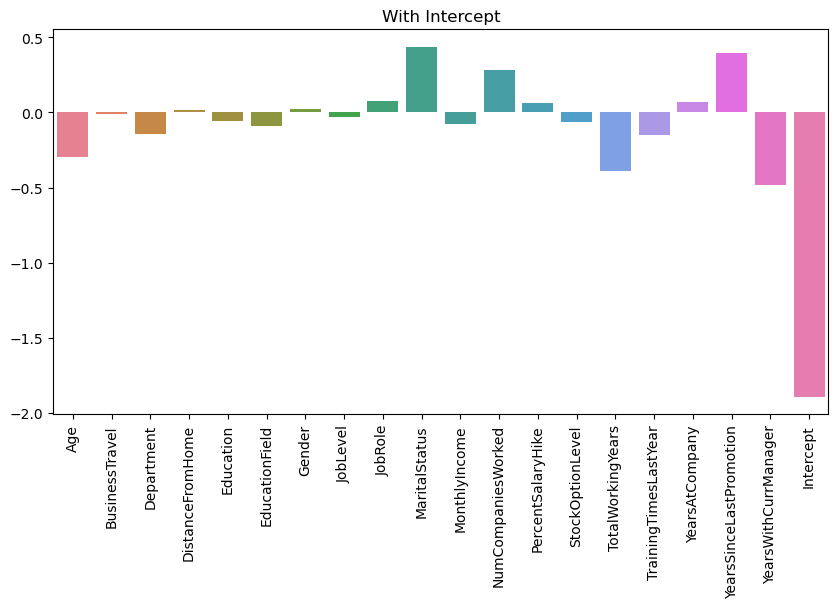

In [81]:
# Plot of the coefficients
plt.figure(figsize=(10, 5))
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');
plt.xticks(rotation=90);

Reduced-set of features

In [83]:
# Normalization of the features
Scaler_X2 = StandardScaler()
X2_train  = Scaler_X2.fit_transform(X2_train)
X2_test   = Scaler_X2.transform(X2_test)

# Fit the logistic regression model
model2 = LogisticRegression()
model2.fit(X2_train, Y_train)

# Make the prediction on the test
Y_pred = model2.predict(X2_test)

# Print accuracy and confusion matrix
print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Accuracy on the test set: 0.85
Confusion matrix:
 [[747   0]
 [130   0]]


In [99]:
# Classification report
print(classification_report(Y_test, Y_pred, zero_division=True));

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       747
           1       1.00      0.00      0.00       130

    accuracy                           0.85       877
   macro avg       0.93      0.50      0.46       877
weighted avg       0.87      0.85      0.78       877



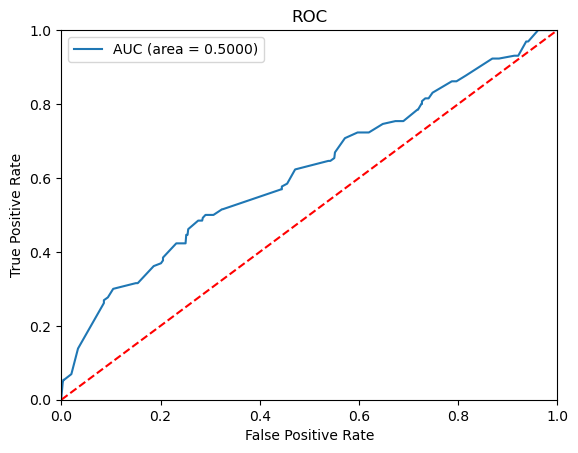

In [101]:
# Area Under Curve (AUC)
model_roc_auc = roc_auc_score(Y_test, model2.predict(X2_test))

# Plot
fpr, tpr, thresholds = roc_curve(Y_test, model2.predict_proba(X2_test)[:,1])
plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.0]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend();

In [103]:
## Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model2.coef_[0])):
    coefficients[X2.columns[i]] = model2.coef_[0][i]

# Add the intercept
coefficients['Intercept'] = model2.intercept_[0]
coefficients

{'BusinessTravel': -0.0048531075492753775,
 'Department': -0.11905834518423696,
 'EducationField': -0.10188676737035514,
 'MaritalStatus': 0.4689589890256318,
 'Intercept': -1.7122781226399817}

In [105]:
# Coefficients as DataFrame
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe

,BusinessTravel,Department,EducationField,MaritalStatus,Intercept
0,-0.004853,-0.119058,-0.101887,0.468959,-1.712278


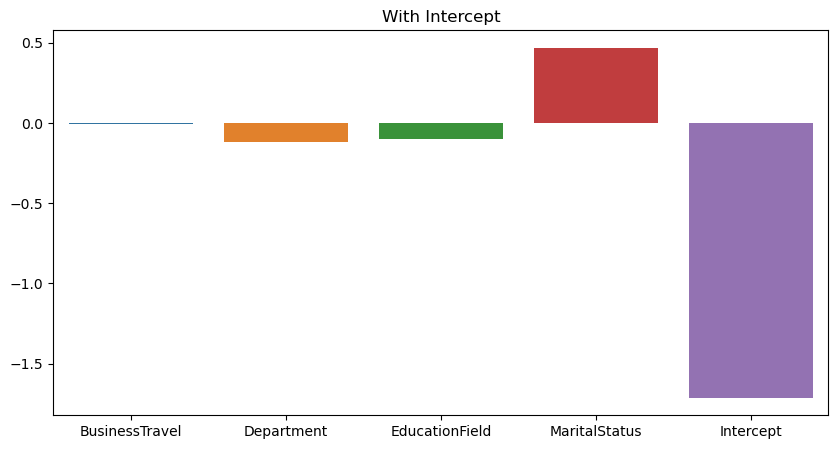

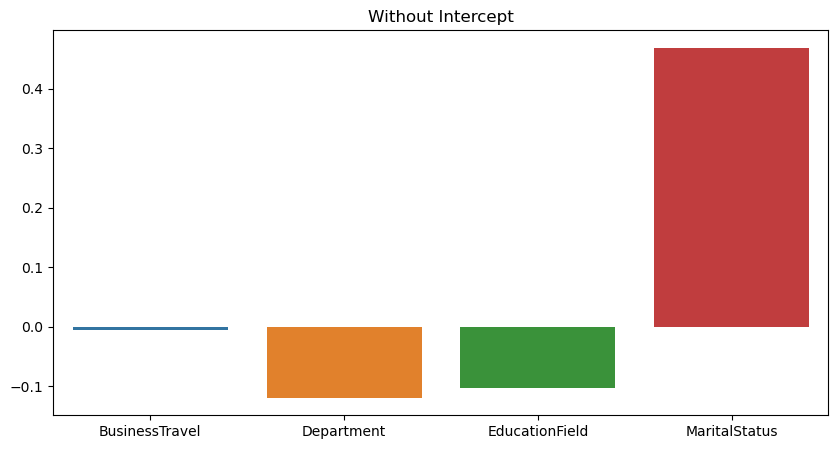

In [107]:
# Plot of the coefficients - with intercept
plt.figure(figsize=(10, 5))
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');

# Plot of the coefficients - without intercept
plt.figure(figsize=(10, 5))
sns.barplot(data = coefficients_dataframe[['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']]);
plt.title('Without Intercept');

The logistic regression model achieved about 85% accuracy, which matches the baseline due to class imbalance. However, the model’s ability to correctly identify employees who leave (recall) was low. For this problem, improving recall and overall balance of precision and recall is more important than raw accuracy. Further steps like handling imbalance and testing other models would help improve performance.